In [ ]:
from google.colab import files
uploaded=files.upload()

Saving the_office_lines_scripts.csv to the_office_lines_scripts.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


#Cleaning Functions

 

 





In [ ]:
 def clean_line_text(df):
    import re
    badChars = re.compile('[^A-Z \-?\.&\'\[\],*!\%]', re.I)
    df['line_text'] = df['line_text'].map(lambda x: badChars.sub('', x))
    return df

def clean_speaker_names(df):
    df['speaker'] = df['speaker'].str.strip().str.lower()
    return df

def drop_deleted_scenes(df):
    df = df[df['deleted'] == False]
    del df['deleted']
    return df.reset_index(drop=True)

In [ ]:
def do_all_data_loading():
    df=pd.read_csv("the_office_lines_scripts.csv")
    df = clean_line_text(df)
    df = clean_speaker_names(df)
    df = drop_deleted_scenes(df)
    return df

In [ ]:
 df = do_all_data_loading()

In [ ]:
df.head(n=10)

,id,season,episode,scene,line_text,speaker
0,1,1,1,1,All right Jim. Your quarterlies look very good...,michael
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",jim
2,3,1,1,1,So you've come to the master for guidance? Is ...,michael
3,4,1,1,1,"Actually, you called me in here, but yeah.",jim
4,5,1,1,1,"All right. Well, let me show you how it's done.",michael
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",michael
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for yea...",michael
7,8,1,1,3,Well. I don't know.,pam
8,9,1,1,3,"If you think she's cute now, you should have s...",michael
9,10,1,1,3,What?,pam


##How many characters are there?

In [ ]:
df['speaker'].nunique()

771

##Names of the characters

In [ ]:
 print(df.speaker.unique())

['Michael' 'Jim' 'Pam' 'Dwight' 'Jan' 'Michel' 'Todd Packer' 'Phyllis'
 'Stanley' 'Oscar' 'Angela' 'Kevin' 'Ryan' 'Man' 'Roy'
 'Documentary Crew Member' 'Mr. Brown' 'Toby' 'Kelly' 'Meredith'
 'Travel Agent' 'Man on Phone' 'Everybody' 'Lonny' 'Darryl' 'Teammates'
 'Michael and Dwight' 'Warehouse worker' 'Madge' 'Worker' 'Packer'
 'Warehouse Worker' 'Katy' 'Guy at bar' 'Other Guy at Bar' 'Guy At Bar'
 'Pam and Jim' 'Employee' "Chili's Employee" 'Waitress' 'Manager'
 "Kevin's computer" 'Warehouse Guy' 'Warehouse guy' 'Warehouse guys'
 'Video' 'Man in Video' 'Actor' 'Redheaded Actress' "Mr. O'Malley"
 'Albiny' "Pam's Mom" 'Carol' 'Bill' 'Everyone' 'Crowd' 'song' 'Song'
 'Dwight and Michael' 'Sherri' 'Creed' 'Devon' 'Children' 'Kid'
 'Vance Refrigeration Worker #1' 'Vance Refrigeration Worker #2'
 'Hank the Security Guard' 'Ira' "Ryan's Voicemail" 'Master' 'Alyssa'
 'Christian' 'Hostess' 'Michael and Christian' 'Sadiq (IT guy)' 'Mark'
 'Improv Teacher' 'Mary-Beth' 'Girl acting Pregnant' 'Ac

##Number of lines per Character and  who has the most lines across all episodes

In [ ]:
 df['speaker'].value_counts()

Michael             12140
Dwight               7531
Jim                  6816
Pam                  5376
Andy                 3968
                    ...  
Dwight & Nate           1
Phyliss                 1
Ryan and Michael        1
TV                      1
Carol Stills            1
Name: speaker, Length: 793, dtype: int64

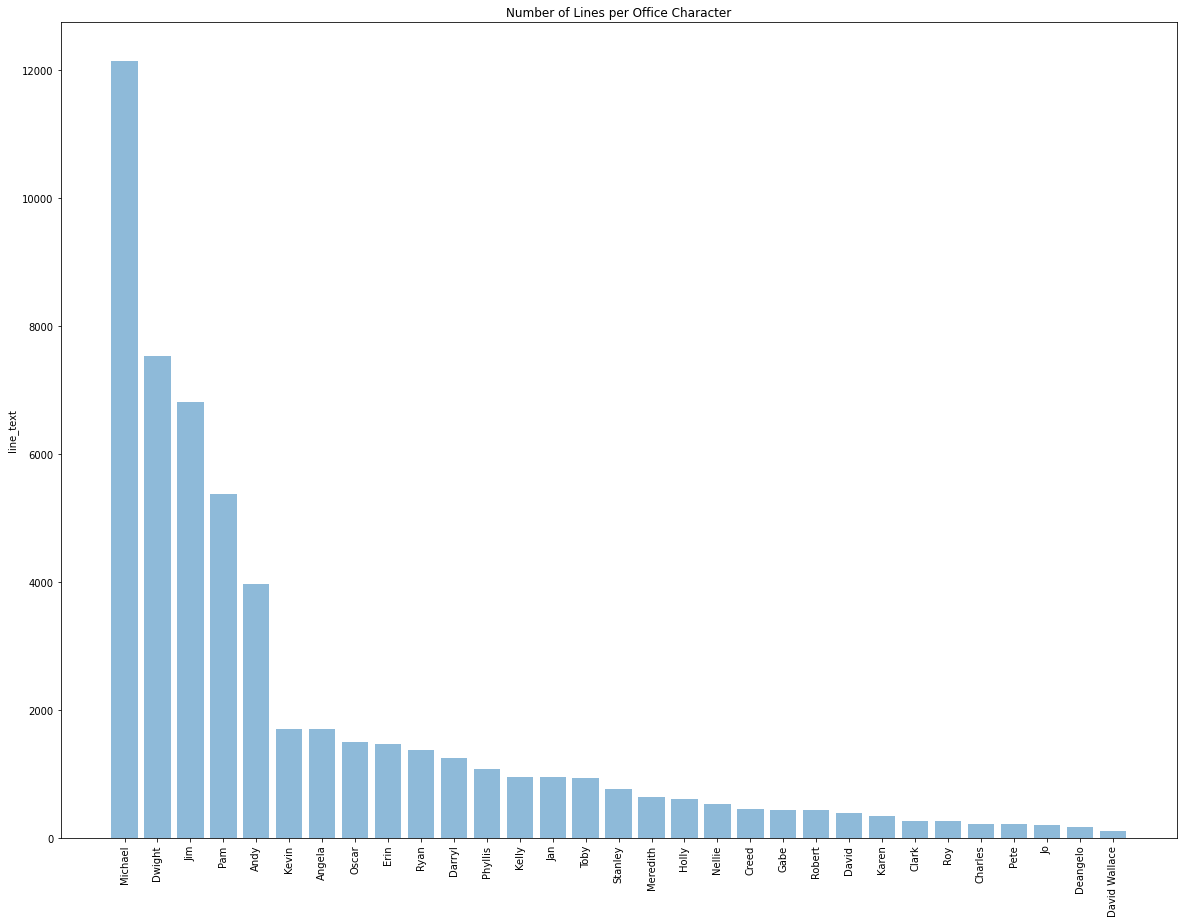

In [ ]:
officelines_total = df.groupby( [ "speaker"] ).size().to_frame(name = 'line_text').reset_index().sort_values('line_text', ascending = False)
characters_with_at_least_100_lines = officelines_total[officelines_total['line_text'] >= 100]

characters = characters_with_at_least_100_lines['speaker']
y_pos = np.arange(len(characters))
performance = characters_with_at_least_100_lines['line_text']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, characters, rotation = 90)
plt.ylabel('line_text')
plt.title('Number of Lines per Office Character')
plt.rcParams["figure.figsize"] = (20,30) 
plt.show()

#Number of times "That's what she said" joke comes up

In [ ]:
def line_search(line, speaker=None):
    if speaker:
        speaker = df['speaker'] == speaker
    else:
        speaker = True

    line = line.replace(' ', '\s*')
    line = df['line_text'].str.contains(line, regex=True, flags=re.I)

    return df[line & speaker]

In [ ]:
df.loc[line_search("That's what she said").index]

,id,season,episode,scene,line_text,speaker
1963,2545,2,2,24,That's what she said. Pam?,michael
2009,2591,2,2,34,Does that include 'That's What She Said'?,jim
2012,2594,2,2,34,THAT'S WHAT SHE SAID!,michael
4090,5325,2,10,2,"A, that's what she said, and B, I wanted it to...",michael
4942,6322,2,12,33,That's what she said.,dwight
6026,7644,2,17,6,That's what she said!,michael
7044,8872,2,21,22,That's what she said. [Jim mouths these words ...,michael
7722,9624,3,1,49,I am glad that today spurred social change. T...,michael
9002,10904,3,5,59,That's what she said. [Stanley and Michael bot...,stanley
10692,12594,3,10,49,Oh. [She whispers in his ear. Michael starts t...,michael


In [ ]:
df.loc[line_search("That's what she said").index]['speaker'].value_counts()

michael                23
dwight                  3
jim                     2
stanley                 1
jan                     1
everyone                1
deposition reporter     1
pam                     1
david                   1
holly                   1
creed                   1
Name: speaker, dtype: int64

##Five examples of the joke "That's what she said"

In [ ]:
setups = df.loc[line_search("That's what she said").index]
setups[setups['speaker'] == 'michael'][:5]

,id,season,episode,scene,line_text,speaker
1963,2545,2,2,24,That's what she said. Pam?,michael
2012,2594,2,2,34,THAT'S WHAT SHE SAID!,michael
4090,5325,2,10,2,"A, that's what she said, and B, I wanted it to...",michael
6026,7644,2,17,6,That's what she said!,michael
7044,8872,2,21,22,That's what she said. [Jim mouths these words ...,michael


In [ ]:
def numwords(line):
    return len(line.split(" "))


df['length'] = df['line_text'].apply(numwords)
display(df.head())

,id,season,episode,scene,line_text,speaker,length
0,1,1,1,1,All right Jim. Your quarterlies look very good...,michael,14
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",jim,9
2,3,1,1,1,So you've come to the master for guidance? Is ...,michael,14
3,4,1,1,1,"Actually, you called me in here, but yeah.",jim,8
4,5,1,1,1,"All right. Well, let me show you how it's done.",michael,10


#Total number of words per line for each character

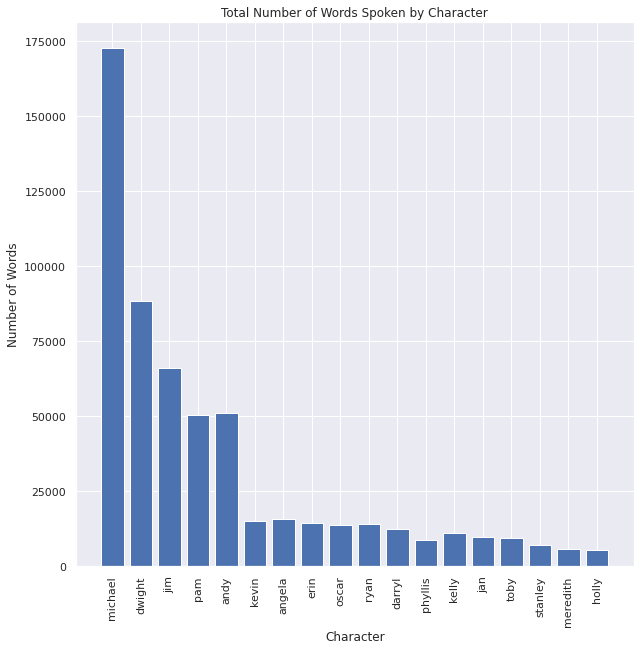

In [ ]:
listcharacters = characters['speaker'].tolist()


def totalwords(character):
    rows = (df.loc[df['speaker'] == character, 'length'])
    totalwords = rows.sum()
    return totalwords


characterwords = []
for character in listcharacters:
    characterwords.append(totalwords(character))


y_pos = np.arange(len(listcharacters))
plt.bar(y_pos, characterwords)
plt.xlabel('Character')
plt.xticks(y_pos, listcharacters, rotation='vertical')
plt.ylabel('Number of Words')
plt.title('Total Number of Words Spoken by Character')
plt.rcParams["figure.figsize"] = (10,5) 
plt.show()

#Average of words per line for each character

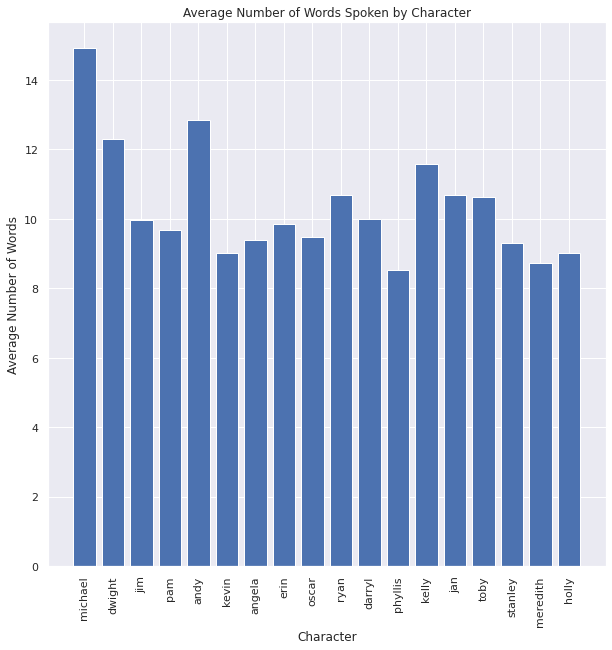

In [ ]:
listcharacters = characters['speaker'].tolist()


def avgwords(character):
    rows = (df.loc[df['speaker'] == character, 'length'])
    avgwords = rows.mean()
    return avgwords


characterwords = []
for character in listcharacters:
    characterwords.append(avgwords(character))


y_pos = np.arange(len(listcharacters))
plt.bar(y_pos, characterwords)
plt.xlabel('Character')
plt.xticks(y_pos, listcharacters, rotation='vertical')
plt.ylabel('Average Number of Words')
plt.title('Average Number of Words Spoken by Character')
plt.rcParams["figure.figsize"] = (10,10) 
plt.show()

#The average percent of lines for each character

In [ ]:
df['Count'] = df['line_text'].str.split().str.len()
all_grouped = df.groupby('speaker', as_index=False)['Count'].sum()


all_grouped['Percent_of_Lines'] = all_grouped['Count'] / all_grouped['Count'].sum()
all_grouped.sort_values(by='Percent_of_Lines', ascending=False).head()

,speaker,Count,Percent_of_Lines
453,michael,169167,0.258998
212,dwight,87010,0.133214
348,jim,65180,0.099792
26,andy,50469,0.077269
534,pam,49722,0.076125


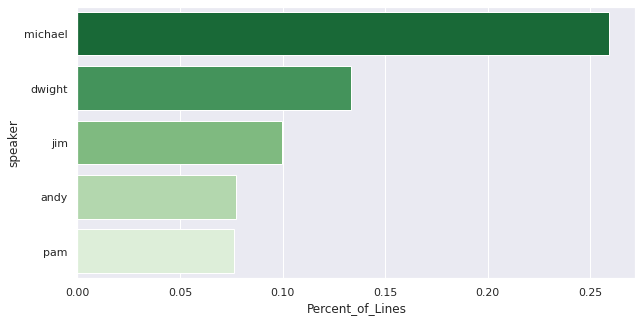

In [ ]:
ordered = all_grouped.sort_values(by='Percent_of_Lines', ascending=False)[:5]
sns.barplot(x='Percent_of_Lines', y='speaker', data=ordered, palette='Greens_r') 
sns.set(rc={'figure.figsize':(5,5)})
